# Assignment III: Using Compilation Techniques and GPUs for Optimization

## Exercise 1 - Cythonize the STREAM Benchmark

### Task 1.1: Develop a Cython version of the STREAM benchmark

This is the code I put in cythonstream.pyx:

```python
#cython: boundscheck=False
import time
import numpy as np
cimport numpy as cnp

def stream(unsigned int STREAM_ARRAY_SIZE):
    cdef cnp.float64_t[:] a, b, c
    cdef double scalar

    a = np.ones(STREAM_ARRAY_SIZE, dtype=np.float64)
    b = np.ones(STREAM_ARRAY_SIZE, dtype=np.float64) * 2.0
    c = np.zeros(STREAM_ARRAY_SIZE, dtype=np.float64)
    scalar = 2.0

    times = [0, 0, 0, 0]
    timer = time.time_ns

    def copy():
        cdef unsigned int i
        times[0] = timer()
        for i in range(STREAM_ARRAY_SIZE):
            c[i] = a[i]
        times[0] = timer() - times[0]

    def scale():
        cdef unsigned int i
        times[1] = timer()
        for i in range(STREAM_ARRAY_SIZE):
            b[i] = scalar*c[i]
        times[1] = timer() - times[1]

    def add():
        cdef unsigned int i
        times[2] = timer()
        for i in range(STREAM_ARRAY_SIZE):
            c[i] = a[i]+b[i]
        times[2] = timer() - times[2]

    def triad():
        cdef unsigned int i
        times[3] = timer()
        for i in range(STREAM_ARRAY_SIZE):
            a[i] = b[i]+scalar*c[i]
        times[3] = timer() - times[3]

    copy()
    scale()
    add()
    triad()

    # Times are in ns, so without conversion, the calculation would be in GB/s
    return times
```

### Task 1.2: Plot the bandwidth results varying the arrays' size

Computing experiment 1
Computing experiment 2
Computing experiment 3
Computing experiment 4
Computing experiment 5


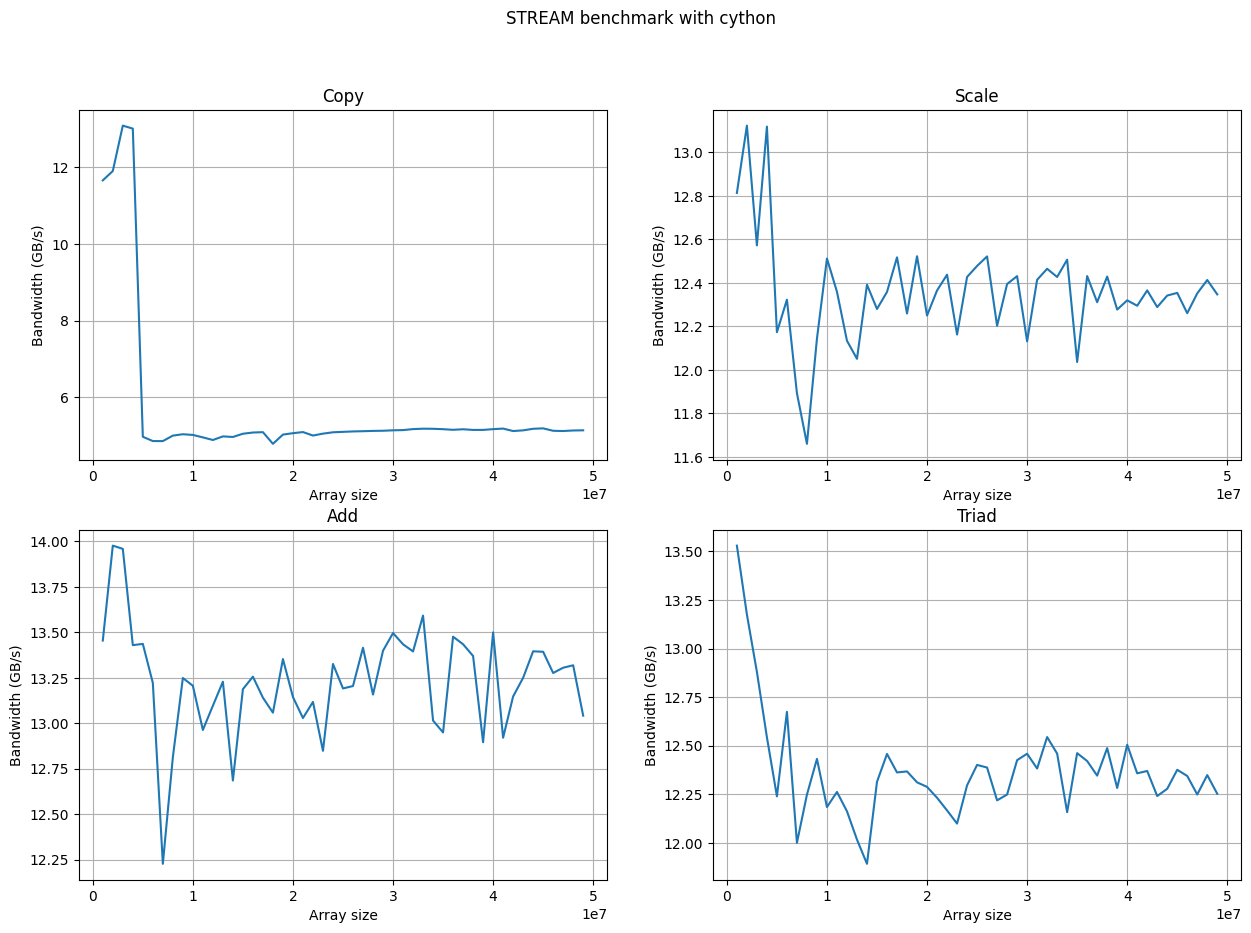

In [1]:
import cythonstream
import matplotlib.pyplot as plt
import statistics


def bandwidth(STREAM_ARRAY_SIZE):
    times = cythonstream.stream(STREAM_ARRAY_SIZE)
    copy, scale, add, triad = times

    copy = (2 * 8 * STREAM_ARRAY_SIZE) / copy
    scale = (2 * 8 * STREAM_ARRAY_SIZE) / scale
    add = (3 * 8 * STREAM_ARRAY_SIZE) / add
    triad = (3 * 8 * STREAM_ARRAY_SIZE) / triad

    return copy, scale, add, triad


def plot(nb_experiment=5):
    """
    Plot the STREAM benchmark for the given data type and makes an average on nb_experiment
    """
    WANTED_VALUES = [i for i in range(1000 * 1000, 50 * 1000 * 1000, 1000 * 1000)]

    copy_bandwidth, scale_bandwidth, add_bandwidth, triad_bandwidth = (
        [[] for _ in range(nb_experiment)],
        [[] for _ in range(nb_experiment)],
        [[] for _ in range(nb_experiment)],
        [[] for _ in range(nb_experiment)],
    )

    for i in range(nb_experiment):
        print(f"Computing experiment {i + 1}")
        for value in WANTED_VALUES:
            copy, scale, add, triad = bandwidth(value)

            copy_bandwidth[i].append(copy)
            scale_bandwidth[i].append(scale)
            add_bandwidth[i].append(add)
            triad_bandwidth[i].append(triad)

    copy_average = [statistics.mean(values) for values in zip(*copy_bandwidth)]
    scale_average = [statistics.mean(values) for values in zip(*scale_bandwidth)]
    add_average = [statistics.mean(values) for values in zip(*add_bandwidth)]
    triad_average = [statistics.mean(values) for values in zip(*triad_bandwidth)]

    _, axs = plt.subplots(2, 2, figsize=(15, 10))

    axs[0, 0].plot(WANTED_VALUES, copy_average)
    axs[0, 0].set_title("Copy")
    axs[0, 0].set_xlabel("Array size")
    axs[0, 0].set_ylabel("Bandwidth (GB/s)")
    axs[0, 0].grid()

    axs[0, 1].plot(WANTED_VALUES, scale_average)
    axs[0, 1].set_title("Scale")
    axs[0, 1].set_xlabel("Array size")
    axs[0, 1].set_ylabel("Bandwidth (GB/s)")
    axs[0, 1].grid()

    axs[1, 0].plot(WANTED_VALUES, add_average)
    axs[1, 0].set_title("Add")
    axs[1, 0].set_xlabel("Array size")
    axs[1, 0].set_ylabel("Bandwidth (GB/s)")
    axs[1, 0].grid()

    axs[1, 1].plot(WANTED_VALUES, triad_average)
    axs[1, 1].set_title("Triad")
    axs[1, 1].set_xlabel("Array size")
    axs[1, 1].set_ylabel("Bandwidth (GB/s)")
    axs[1, 1].grid()

    plt.suptitle("STREAM benchmark with cython")
    plt.show()


plot()

## Exercise 2 - Gauss-Seidel for Poisson Solver

### Task 2.1: Develop the Gauss-Seidel solver with Python List, array, or NumPy

In [3]:
# Decided to do it with numpy and scipy for a more efficient solution
import numpy as np
from scipy.ndimage import correlate

# Define the kernel that represents the neighborhood
kernel = np.array([[0, 1, 0], 
                   [1, 0, 1], 
                   [0, 1, 0]]) / 4


def gauss_seidel_numpy(f):
    newf = f.copy()

    newf[1:-1, 1:-1] = correlate(newf, kernel, mode="constant")[1:-1, 1:-1]

    return newf


def main_numpy(N = 100, iterations = 1000):
    # Define the initial state
    f = np.zeros((N, N))
    f[1:-1, 1:-1] = np.random.rand(N-2, N-2)

    # Iterate the system
    for _ in range(iterations):
        f = gauss_seidel_numpy(f)

    return f


def gauss_seidel_pure(f):
    newf = f.copy()

    for i in range(1, newf.shape[0] - 1):
        for j in range(1, newf.shape[1] - 1):
            newf[i, j] = 0.25 * (
                newf[i, j + 1] + newf[i, j - 1] + newf[i + 1, j] + newf[i - 1, j]
            )

    return newf


def main_pure(N=100, iterations=1000):
    # Define the initial state
    f = np.zeros((N, N))
    f[1:-1, 1:-1] = np.random.rand(N - 2, N - 2)

    # Iterate the system
    for _ in range(iterations):
        f = gauss_seidel_pure(f)

    return f

100
200
300
400
500
600
700
800
900


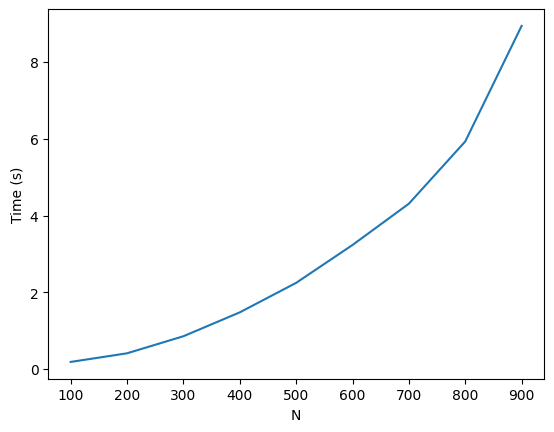

In [4]:
import matplotlib.pyplot as plt
from time import time_ns

def performance_numpy():
    times_numpy = []
    for i in range(100, 1000, 100):
        print(i)
        start = time_ns()
        main_numpy(i)
        times_numpy.append((time_ns() - start) / 1e9)

    plt.plot(range(100, 1000, 100), times_numpy)
    plt.xlabel("N")
    plt.ylabel("Time (s)")
    plt.show()

performance_numpy()

10
20
30
40
50
60
70
80
90


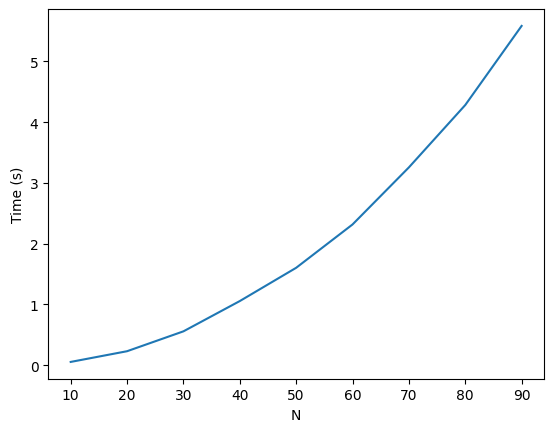

In [5]:
def performance_pure():
    times_pure = []
    for i in range(10, 100, 10):
        print(i)
        start = time_ns()
        main_pure(i)
        times_pure.append((time_ns() - start) / 1e9)

    plt.plot(range(10, 100, 10), times_pure)
    plt.xlabel("N")
    plt.ylabel("Time (s)")
    plt.show()


performance_pure()

As expected, we can clearly see the typical O(N^2) behavior of the Gauss-Seidel method.

Also, we can clearly see that the numpy implementation is much faster than the list and array implementations. However, as it is a library, we may not be able to optimize it much further ourselves. That's why we will use the numpy implementation as a reference for the Cython implementation.

### Task 2.2: Profile the code to identify the part of the code to optimize

In [35]:
from line_profiler import LineProfiler

lp_numpy = LineProfiler()
lp_numpy.add_function(gauss_seidel_numpy)
wrapper_numpy = lp_numpy(main_numpy)
wrapper_numpy(500)
lp_numpy.print_stats()

Timer unit: 1e-09 s

Total time: 2.16629 s
File: /tmp/ipykernel_11183/77294000.py
Function: gauss_seidel at line 11

Line #      Hits         Time  Per Hit   % Time  Line Contents
    11                                           def gauss_seidel(f):
    12      1000  118760557.0 118760.6      5.5      newf = f.copy()
    13                                           
    14      1000 2047111381.0    2e+06     94.5      newf[1:-1, 1:-1] = correlate(newf, kernel, mode="constant")[1:-1, 1:-1]
    15                                           
    16      1000     414424.0    414.4      0.0      return newf

Total time: 2.17376 s
File: /tmp/ipykernel_11183/77294000.py
Function: main at line 19

Line #      Hits         Time  Per Hit   % Time  Line Contents
    19                                           def main(N = 100, iterations = 1000):
    20                                               # Define the initial state
    21         1      84887.0  84887.0      0.0      f = np.zeros((N, N)

As expected, the most time-consuming part of the `gauss_seidel` function is the `aggregate` function which is already compile. We will not be able to optimize it much further. However, we can optimize the `gauss_seidel_pure` function.

In [41]:
lp_pure = LineProfiler()
lp_pure.add_function(gauss_seidel_pure)
wrapper_pure = lp_pure(main_pure)
wrapper_pure(50)
lp_pure.print_stats()

Timer unit: 1e-09 s

Total time: 3.50309 s
File: /tmp/ipykernel_11183/1521187067.py
Function: gauss_seidel_pure at line 31

Line #      Hits         Time  Per Hit   % Time  Line Contents
    31                                           def gauss_seidel_pure(f):
    32      1000    5437678.0   5437.7      0.2      newf = f.copy()
    33                                           
    34     49000    7001260.0    142.9      0.2      for i in range(1, newf.shape[0] - 1):
    35   2352000  368935881.0    156.9     10.5          for j in range(1, newf.shape[1] - 1):
    36   4608000 1092746720.0    237.1     31.2              newf[i, j] = 0.25 * (
    37   2304000 2028670090.0    880.5     57.9                  newf[i, j + 1] + newf[i, j - 1] + newf[i + 1, j] + newf[i - 1, j]
    38                                                       )
    39                                           
    40      1000     301954.0    302.0      0.0      return newf

Total time: 5.04151 s
File: /tmp/ipykern

### Task 2.3: Use the Cython Annotation tool to identify the parts to use Cython

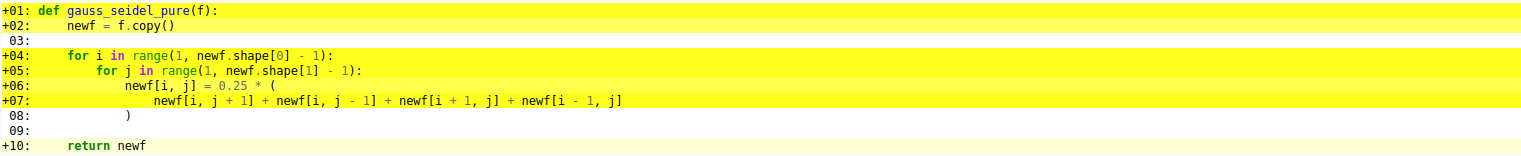

### Task 2.4: Use Cython to optimize the part you identified as the most computationally expensive

Now, the main part is cythonized:
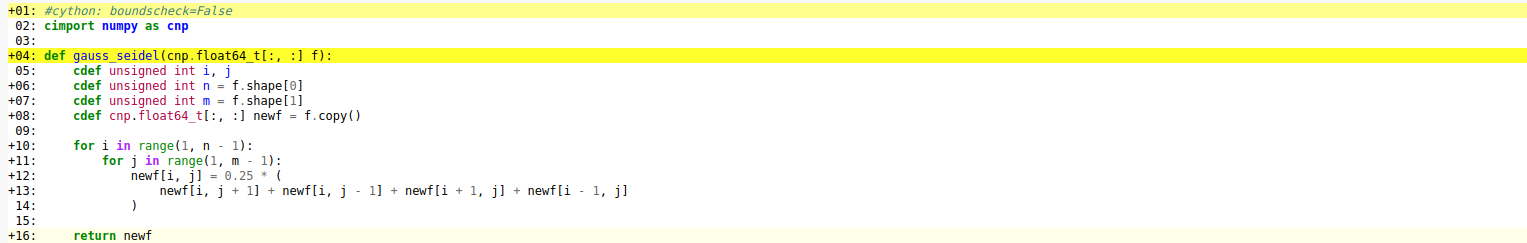

100
200
300
400
500
600
700
800
900


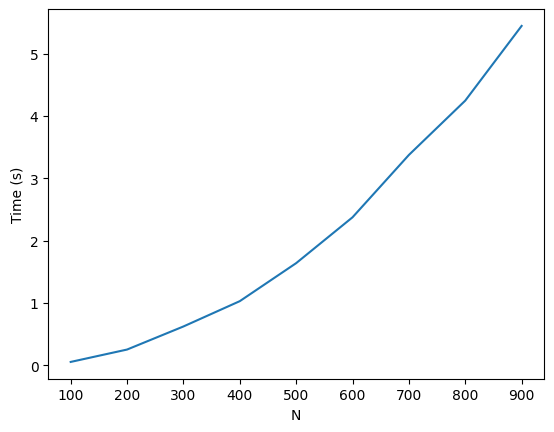

In [1]:
import gauss
import numpy as np
import matplotlib.pyplot as plt
from time import time_ns

def main_cython(N=100, iterations=1000):
    # Define the initial state
    f = np.zeros((N, N))
    f[1:-1, 1:-1] = np.random.rand(N - 2, N - 2)
    
    # Convert the numpy array to a memory view
    f_view = f

    # Iterate the system
    for _ in range(iterations):
        f_view = gauss.gauss_seidel(f_view)

    return np.asarray(f_view)


def performance_cython():
    times_cython = []
    for i in range(100, 1000, 100):
        print(i)
        start = time_ns()
        main_cython(i)
        times_cython.append((time_ns() - start) / 1e9)

    plt.plot(range(100, 1000, 100), times_cython)
    plt.xlabel("N")
    plt.ylabel("Time (s)")
    plt.show()


performance_cython()

As we can see, we have greatly improved the performance of the `gauss_seidel` function; now it is even better than the numpy implementation.

### Task 2.5: Use PyTorch to port your code to Nvidia GPUs